In [2]:
# ==============================================================================
# 1. SETUP & LIBRARY IMPORT
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library SVM
from sklearn.svm import SVC

# Library Evaluasi & Feature Importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance # Khusus buat SVM

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Library berhasil di-import. Siap menggunakan SVM.")

✅ Library berhasil di-import. Siap menggunakan SVM.


In [3]:
# ==============================================================================
# 2. MEMUAT DATA PREPROCESSED
# ==============================================================================
# Lokasi data relative terhadap notebook ini (Mundur 3 folder)
DATA_PATH = "../../../data/"

try:
    print("📂 Sedang memuat data dari folder 'data/'...")

    # Load Data Latih (X_train & y_train - Sudah Balanced & Scaled)
    X_train = pd.read_csv(DATA_PATH + "X_train_final.csv")
    y_train = pd.read_csv(DATA_PATH + "y_train_final.csv").values.ravel()

    # Load Data Uji (X_test & y_test - Data Murni)
    X_test = pd.read_csv(DATA_PATH + "X_test_final.csv")
    y_test = pd.read_csv(DATA_PATH + "y_test_final.csv").values.ravel()

    # Load Label Encoder
    le = joblib.load(DATA_PATH + "label_encoder.pkl")
    class_names = le.classes_

    print("✅ Data berhasil dimuat!")
    print(f"   - Data Latih : {X_train.shape[0]} baris")
    print(f"   - Data Uji   : {X_test.shape[0]} baris")
    print(f"   - Target Label: {dict(zip(le.classes_, le.transform(le.classes_)))}")

except FileNotFoundError:
    print("❌ Error: File data tidak ditemukan.")

📂 Sedang memuat data dari folder 'data/'...
✅ Data berhasil dimuat!
   - Data Latih : 45080 baris
   - Data Uji   : 5091 baris
   - Target Label: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Marginal': np.int64(3)}


In [5]:
# ==============================================================================
# 3. PELATIHAN MODEL (SVM TRAINING)
# ==============================================================================
print("🔄 Sedang melatih model SVM...")

# Inisialisasi Model SVM
# - kernel='rbf'    : Cocok untuk data yang batasnya melengkung/kompleks
# - probability=True: Agar nanti bisa menghitung probabilitas (penting buat analisis)
# - random_state=42 : Biar konsisten
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Proses Fitting
svm_model.fit(X_train, y_train)

print("✅ Pelatihan Selesai! Model SVM siap dievaluasi.")

🔄 Sedang melatih model SVM...
✅ Pelatihan Selesai! Model SVM siap dievaluasi.


In [7]:
# ==============================================================================
# 4. EVALUASI MODEL
# ==============================================================================
print("📊 Mengevaluasi SVM pada Data Uji (Test Set)...")

# Prediksi Label
y_pred = svm_model.predict(X_test)

# A. Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Akurasi (Accuracy): {accuracy * 100:.2f}%")

# B. Laporan Klasifikasi Lengkap
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

📊 Mengevaluasi SVM pada Data Uji (Test Set)...

🔹 Akurasi (Accuracy): 96.15%

🔹 Classification Report:
              precision    recall  f1-score   support

   Excellent       0.98      0.96      0.97      2818
        Fair       0.75      0.84      0.79        69
        Good       0.95      0.96      0.96      2188
    Marginal       0.94      0.94      0.94        16

    accuracy                           0.96      5091
   macro avg       0.90      0.93      0.91      5091
weighted avg       0.96      0.96      0.96      5091



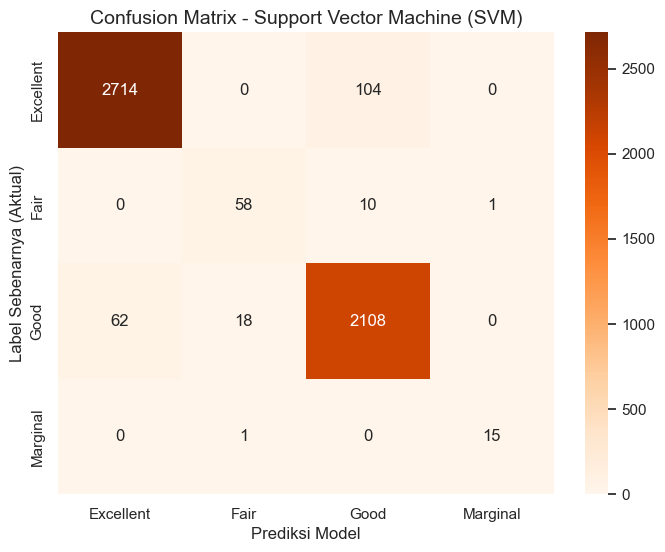

In [9]:
# ==============================================================================
# 5. VISUALISASI CONFUSION MATRIX
# ==============================================================================
plt.figure(figsize=(8, 6))

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap (Pakai warna Oranye 'Oranges' biar beda suasana)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - Support Vector Machine (SVM)', fontsize=14)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Aktual)', fontsize=12)
plt.show()

⏳ Sedang menghitung Feature Importance (Teknik Permutasi)...


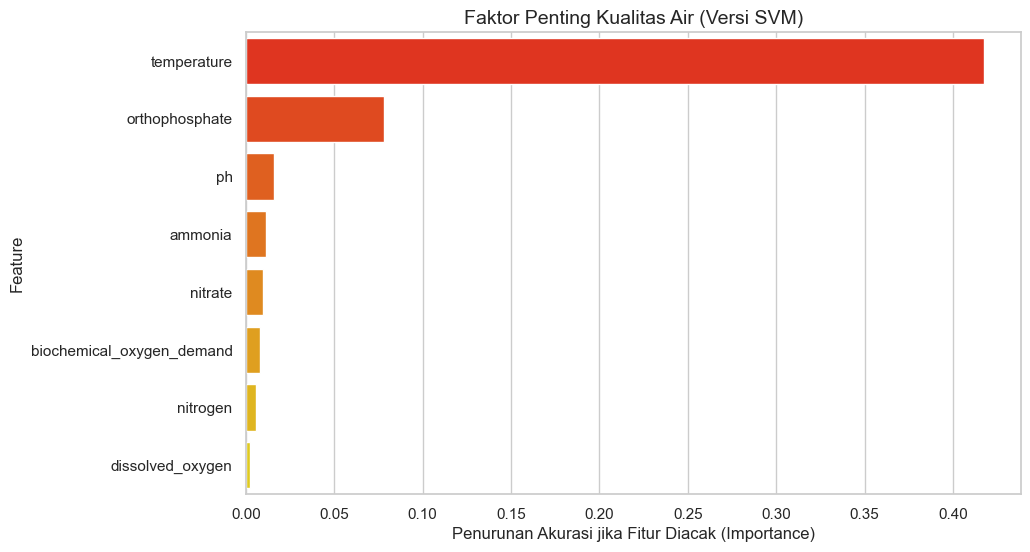

Analisis: Grafik ini menunjukkan fitur mana yang paling 'dijaga' oleh SVM.


In [10]:
# ==============================================================================
# 6. ANALISIS PENTINGNYA FITUR (PERMUTATION IMPORTANCE)
# ==============================================================================
print("⏳ Sedang menghitung Feature Importance (Teknik Permutasi)...")

# Hitung importance (mengacak fitur 5 kali untuk validasi)
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=5, random_state=42)

# Ambil nilai rata-ratanya
importances = perm_importance.importances_mean
feature_names = X_train.columns

# Buat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='autumn', hue='Feature', legend=False)

plt.title('Faktor Penting Kualitas Air (Versi SVM)', fontsize=14)
plt.xlabel('Penurunan Akurasi jika Fitur Diacak (Importance)')
plt.show()

print("Analisis: Grafik ini menunjukkan fitur mana yang paling 'dijaga' oleh SVM.")

🎨 Sedang menggambar Peta Wilayah SVM (Decision Boundary)...
✅ Gambar 'svm_boundary_visual.png' berhasil disimpan.


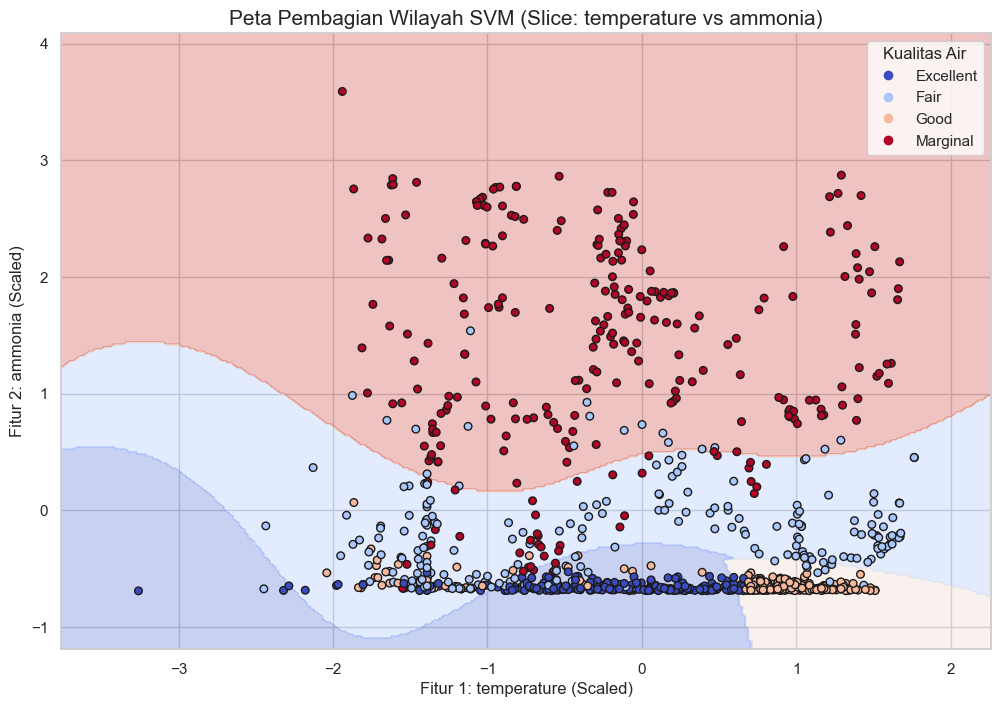

In [12]:
# ==============================================================================
# 7. VISUALISASI SVM (DECISION BOUNDARY - 2D SLICE)
# ==============================================================================
from sklearn.svm import SVC
import numpy as np

print("🎨 Sedang menggambar Peta Wilayah SVM (Decision Boundary)...")

# 1. Pilih 2 Fitur Paling Penting (Berdasarkan analisis RF/XGBoost tadi)
# Kita pakai 'temperature' dan 'ammonia' karena biasanya ini yang paling ngaruh
feat1 = 'temperature'
feat2 = 'ammonia'

# Ambil index kolomnya
idx1 = list(X_train.columns).index(feat1)
idx2 = list(X_train.columns).index(feat2)

# Siapkan data 2D saja (Kita latih ulang model mini biar bisa digambar 2D)
X_viz = X_train.iloc[:, [idx1, idx2]].values
y_viz = y_train

# Kita ambil sampel 1000 data saja biar nggambarnya cepet (karena data kamu 45.000)
# Kalau semua data dipakai, nanti gambarnya jadi 'blok' warna doang saking padatnya
idx_sample = np.random.choice(len(X_viz), 1000, replace=False)
X_viz_sample = X_viz[idx_sample]
y_viz_sample = y_viz[idx_sample]

# Latih SVM Mini (2D)
svm_viz = SVC(kernel='rbf', C=1.0, random_state=42)
svm_viz.fit(X_viz_sample, y_viz_sample)

# 2. Bikin Jaring-Jaring Koordinat (Meshgrid)
x_min, x_max = X_viz_sample[:, 0].min() - 0.5, X_viz_sample[:, 0].max() + 0.5
y_min, y_max = X_viz_sample[:, 1].min() - 0.5, X_viz_sample[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 3. Prediksi Wilayah
Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Plot Gambar
plt.figure(figsize=(12, 8))

# Gambar Wilayah Warna-warni (Kontur)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Gambar Titik Data Asli (Scatter)
scatter = plt.scatter(X_viz_sample[:, 0], X_viz_sample[:, 1], c=y_viz_sample, 
                      cmap='coolwarm', edgecolors='k', s=30)

# Aksesoris Gambar
plt.xlabel(f'Fitur 1: {feat1} (Scaled)', fontsize=12)
plt.ylabel(f'Fitur 2: {feat2} (Scaled)', fontsize=12)
plt.title(f'Peta Pembagian Wilayah SVM (Slice: {feat1} vs {feat2})', fontsize=15)

# Bikin Legenda Manual
handles, _ = scatter.legend_elements()
legend_labels = class_names # Menggunakan nama kelas asli
plt.legend(handles, legend_labels, title="Kualitas Air")

# Simpan PNG
plt.savefig('svm_boundary_visual.png', dpi=300, bbox_inches='tight')
print("✅ Gambar 'svm_boundary_visual.png' berhasil disimpan.")
plt.show()